# Projeto de Redes Neurais Artificiais - Previsão de inadiplencia de Cartão de Credito 

Neste projeto de Redes Neurais Artificiais foi escolhida a base Default of Credit Card Clients (Inadimplência de clientes de cartão de crédito): https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

A tarefa de predição deste dataset é uma classificação binária para prever se um cliente de cartão de crédito irá dar default (inadimplência) no próximo mês.

Valores possíveis:

1 → houve inadimplência

0 → pagamento regular

A escolha deste dataset foi feita de acordo com os Itens abaixo:

*   **Boa quantidade de instâncias (~30.000):** Um número considerável de exemplos que permite treinar modelos complexos como Redes Neurais de forma eficaz.
*   **Variáveis Numéricas e Categóricas:** O dataset contém uma mistura de características, incluindo informações demográficas, históricas de pagamento e valores financeiros, o que exige técnicas de pré-processamento variadas (como One-Hot Encoding e Padronização) e torna o problema mais realista.
*   **Ausência de valores faltantes:** Simplifica a etapa de pré-processamento, permitindo focar no treinamento do modelo.
*   **Classes com desbalanceamento moderado (~78% não default vs 22% default):** Embora haja um desbalanceamento, ele não é extremo, o que permite aplicar técnicas de modelagem padrão inicialmente e, se necessário, explorar métodos para lidar com desbalanceamento em etapas futuras.

A tarefa de predição clara (classificação binária de default) e a relevância prática no domínio financeiro tornam este dataset um excelente estudo de caso para aplicar e avaliar o desempenho de modelos de Redes Neurais.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Configuração para visualizações
plt.style.use('default')
sns.set_palette("husl")

### Carregamento e Exploração dos Dados

In [76]:
# Carregamento dos dados
# Nota: O arquivo usa ';' como separador
df = pd.read_csv('default of credit card clients.csv', sep=';', header=1)

In [77]:
print("\nDESCRIÇÃO DO CONJUNTO DE DADOS")
print("-" * 40)

print(f"Dimensões do dataset: {df.shape}")
print(f"Número de objetos (amostras): {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")  # -1 porque uma coluna é o target


DESCRIÇÃO DO CONJUNTO DE DADOS
----------------------------------------
Dimensões do dataset: (30000, 25)
Número de objetos (amostras): 30000
Número de características: 24


In [78]:
# Informações básicas sobre o dataset
print(f"\nPrimeiras 5 linhas do dataset:")
df.head()


Primeiras 5 linhas do dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [79]:
print(f"\nInformações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   3

In [80]:
print(f"\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [81]:
# Identificação da tarefa de predição
target_column = 'default payment next month'
features = [col for col in df.columns if col != target_column]

In [82]:
print(f"\nTAREFA DE PREDIÇÃO:")
print(f"  Classificação binária - Predizer se um cliente irá dar default no pagamento do cartão de crédito")
print(f"  Variável alvo: '{target_column}'")

print(f"\nCARACTERÍSTICAS DO CONJUNTO:")
print(f"  ID: Identificador único do cliente")
print(f"  LIMIT_BAL: Limite de crédito (NT dollar)")
print(f"  SEX: Gênero (1=masculino, 2=feminino)")
print(f"  EDUCATION: Educação (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros)")
print(f"  MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)")
print(f"  AGE: Idade em anos")
print(f"  PAY_0 a PAY_6: Status de pagamento (-1=pago em dia, 1=atraso 1 mês, 2=atraso 2 meses, etc.)")
print(f"  BILL_AMT1 a BILL_AMT6: Valor da fatura (NT dollar)")
print(f"  PAY_AMT1 a PAY_AMT6: Valor do pagamento anterior (NT dollar)")


TAREFA DE PREDIÇÃO:
  Classificação binária - Predizer se um cliente irá dar default no pagamento do cartão de crédito
  Variável alvo: 'default payment next month'

CARACTERÍSTICAS DO CONJUNTO:
  ID: Identificador único do cliente
  LIMIT_BAL: Limite de crédito (NT dollar)
  SEX: Gênero (1=masculino, 2=feminino)
  EDUCATION: Educação (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros)
  MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)
  AGE: Idade em anos
  PAY_0 a PAY_6: Status de pagamento (-1=pago em dia, 1=atraso 1 mês, 2=atraso 2 meses, etc.)
  BILL_AMT1 a BILL_AMT6: Valor da fatura (NT dollar)
  PAY_AMT1 a PAY_AMT6: Valor do pagamento anterior (NT dollar)


In [83]:
# Análise das características categóricas vs numéricas
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(0, 7)]
numerical_features = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

print(f"\nTIPOS DE CARACTERÍSTICAS:")
print(f"  Categóricas ({len(categorical_features)}): {categorical_features}")
print(f"  Numéricas ({len(numerical_features)}): {numerical_features}")


TIPOS DE CARACTERÍSTICAS:
  Categóricas (10): ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
  Numéricas (14): ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [84]:
# Análise da variável alvo (proporção das classes)
target_counts = df[target_column].value_counts()
target_proportions = df[target_column].value_counts(normalize=True)

print(f"\nDISTRIBUIÇÃO DA VARIÁVEL ALVO:")
print(f"  Classe 0 (Não default): {target_counts[0]} ({target_proportions[0]:.2%})")
print(f"  Classe 1 (Default): {target_counts[1]} ({target_proportions[1]:.2%})")


DISTRIBUIÇÃO DA VARIÁVEL ALVO:
  Classe 0 (Não default): 23364 (77.88%)
  Classe 1 (Default): 6636 (22.12%)


### Principais Variáveis do Dataset

- **LIMIT_BAL:** Limite de crédito do cliente (NT dollar)
- **SEX:** Gênero (1 = masculino, 2 = feminino)
- **EDUCATION:** Nível de escolaridade (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros)
- **MARRIAGE:** Estado civil (1 = casado, 2 = solteiro, 3 = outros)
- **AGE:** Idade do cliente
- **PAY_0 a PAY_6:** Status de pagamento dos últimos meses (-2 = antecipado, -1 = em dia, 0 = no vencimento, 1+ = meses de atraso)
- **BILL_AMT1 a BILL_AMT6:** Valor da fatura do cartão nos últimos 6 meses
- **PAY_AMT1 a PAY_AMT6:** Valor do pagamento realizado nos últimos 6 meses
- **default payment next month:** Variável alvo (0 = não default, 1 = default)

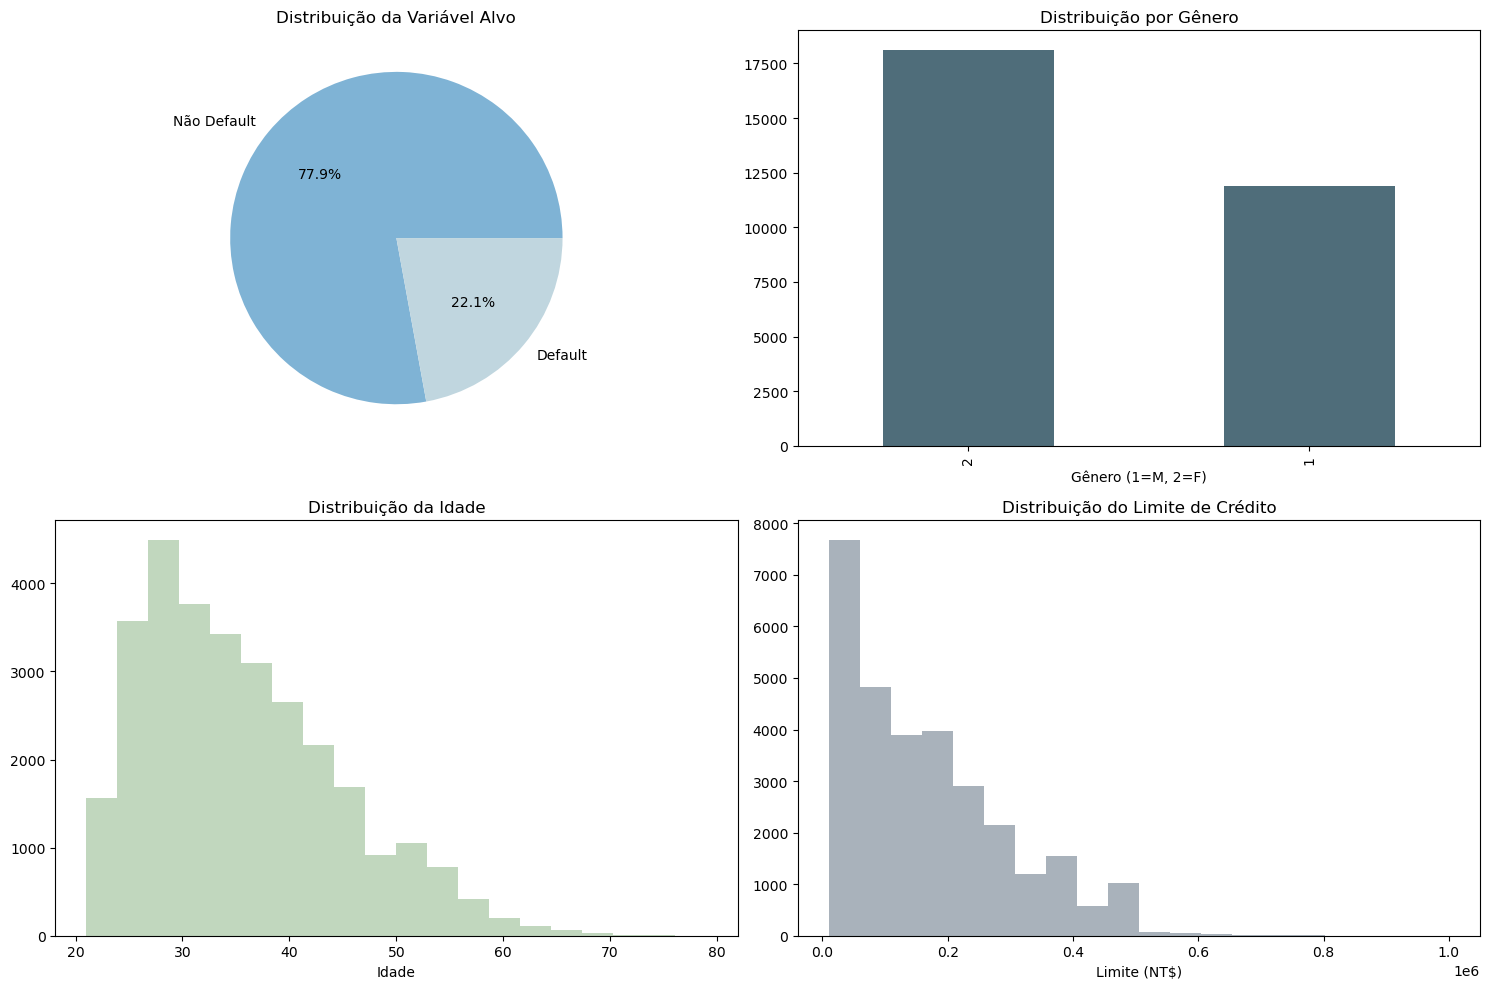

In [85]:
# Visualizações

soft_colors = ['#7FB3D5', '#C0D6DF', '#4F6D7A', '#A7C7A3', '#85929E']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição da variável alvo
axes[0,0].pie(
    target_counts.values,
    labels=['Não Default', 'Default'],
    autopct='%1.1f%%',
    colors=[soft_colors[0], soft_colors[1]]
)
axes[0,0].set_title('Distribuição da Variável Alvo')

# Distribuição de algumas variáveis categóricas
df['SEX'].value_counts().plot(
    kind='bar',
    ax=axes[0,1],
    color=soft_colors[2]
)
axes[0,1].set_title('Distribuição por Gênero')
axes[0,1].set_xlabel('Gênero (1=M, 2=F)')

# Distribuição da idade
axes[1,0].hist(
    df['AGE'],
    bins=20,
    alpha=0.7,
    color=soft_colors[3]
)
axes[1,0].set_title('Distribuição da Idade')
axes[1,0].set_xlabel('Idade')

# Distribuição do limite de crédito
axes[1,1].hist(
    df['LIMIT_BAL'],
    bins=20,
    alpha=0.7,
    color=soft_colors[4]
)
axes[1,1].set_title('Distribuição do Limite de Crédito')
axes[1,1].set_xlabel('Limite (NT$)')

plt.tight_layout()
plt.show()

Distribuição da Variável Alvo (Gráfico de Pizza, canto superior esquerdo)

- O que mostra: Proporção de clientes adimplentes ("Não Default") e inadimplentes ("Default").
-Interpretação:
 - Cerca de 77,9% dos clientes não deram default.
 - Cerca de 22,1% deram default.
-O conjunto de dados é desbalanceado, com mais clientes adimplentes do que inadimplentes.

Distribuição por Gênero (Gráfico de Barras, canto superior direito)

- O que mostra: Quantidade de clientes por gênero.
-Interpretação:
 - O gênero "2" (feminino) é maioria.
 - O gênero "1" (masculino) é minoria.
- Há mais mulheres do que homens na base de dados.

Distribuição da Idade (Histograma, canto inferior esquerdo)

- O que mostra: Frequência de clientes por faixa etária.
- Interpretação:
 - A maioria dos clientes tem entre 25 e 40 anos.
 - Poucos clientes têm mais de 60 anos.
- O público é predominantemente adulto jovem.

Distribuição do Limite de Crédito (Histograma, canto inferior direito)

- O que mostra: Frequência de clientes por faixa de limite de crédito.
- Interpretação:
 - A maior parte dos clientes tem limite de crédito baixo (próximo de zero).
 - Poucos clientes têm limites elevados.
- A distribuição do limite de crédito é assimétrica, concentrada em valores menores.

Resumo Geral

O gráfico mostra que a base de dados é composta principalmente por mulheres, adultos jovens, com limites de crédito baixos e a maioria dos clientes não é inadimplente. Isso ajuda a entender o perfil dos dados antes de aplicar modelos de machine learning.

### PRÉ-PROCESSAMENTO


- One-Hot Encoding para variáveis categóricas (SEX, EDUCATION, MARRIAGE)
- Padronização com StandardScaler para todas as features
- Verificação de valores ausentes
- Transformação dos dados para formato adequado ao MLP

In [86]:
# Remover a coluna ID pois não é relevante para predição
df_processed = df.drop('ID', axis=1, errors='ignore')

In [87]:
# Verificar valores ausentes
missing_values = df_processed.isnull().sum()
print(f"Valores ausentes por coluna:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Nenhum valor ausente encontrado")

Valores ausentes por coluna:
Nenhum valor ausente encontrado


In [88]:
# Separar features e target
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

print(f"\nShape das features: {X.shape}")
print(f"Shape do target: {y.shape}")


Shape das features: (30000, 23)
Shape do target: (30000,)


In [89]:
# Para as variáveis PAY_0 a PAY_6, verificar os valores únicos de cada coluna PAY_*
pay_cols = [col for col in X.columns if col.startswith('PAY_')]
print(f"\nVariáveis de status de pagamento:")
for col in pay_cols:
    unique_vals = sorted(X[col].unique())
    print(f"  {col}: {unique_vals}")


Variáveis de status de pagamento:
  PAY_0: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
  PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
  PAY_AMT1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 39, 40, 41, 44, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 104, 105, 107, 108, 109, 110, 113, 116, 120, 121, 123, 125, 127, 129, 130, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 159, 162, 165, 166, 167, 168, 169, 170, 171, 172, 174, 176, 177, 179, 181, 182, 183, 184, 185, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 

O estratégia acima é importante para:
- Ajudar a entender os valores possíveis em cada variável de status de pagamento.

- Facilitar a identificação de inconsistências ou valores inesperados (como -2, que nem sempre está documentado).

- Serve como etapa de verificação de qualidade dos dados, para depois decidir se vai normalizar, agrupar ou tratar esses valores de forma especial.

In [90]:
# Tratamento das variáveis categóricas
# As variáveis já estão codificadas numericamente, mas vamos aplicar One-Hot Encoding
# para algumas delas para melhor performance do modelo

print(f"\nAplicando transformações...")

# Para SEX, EDUCATION, MARRIAGE - usar One-Hot Encoding
categorical_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
X_encoded = pd.get_dummies(X, columns=categorical_to_encode, prefix=categorical_to_encode)

print(f"Shape após One-Hot Encoding: {X_encoded.shape}")


Aplicando transformações...
Shape após One-Hot Encoding: (30000, 33)


In [91]:
# Padronização das variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print(f"Padronização aplicada usando StandardScaler")
print(f"Shape final das features: {X_scaled.shape}")

Padronização aplicada usando StandardScaler
Shape final das features: (30000, 33)


### TREINAMENTO DE MODELOS MLP COM DIFERENTES CONFIGURAÇÕES

- Múltiplas métricas: Acurácia, Precisão, Recall, F1-Score, AUC-ROC
- Visualizações:

 - Curvas ROC comparativas
 - Matriz de confusão
 - Distribuição das probabilidades preditas
 - Gráficos comparativos entre modelos

- Usaremos 4 modelos MLPClassifier para testes:
 - MLP_Default:
   - Camada de entrada: número de neurônios = número de features (X_train.shape[1]) (33)
   - Camadas ocultas: 1 camada com 100 neurônios (padrão do scikit-learn)
   - Camada de saída: 1 neurônio (classificação binária)

  - MLP_Small:
   - Entrada: número de features (33)
   - Camadas ocultas: 1 camada com 50 neurônios
   - Saída: 1 neurônio

  - MLP_Medium
   - Entrada: número de features (33)
   - Camadas ocultas: 2 camadas
     - Primeira camada oculta: 100 neurônios
     - Segunda camada oculta: 50 neurônios
     - Saída: 1 neurônio

  - MLP_Large
    - Entrada: número de features (33)
    - Camadas ocultas: 3 camadas
      - Primeira oculta: 200 neurônios
      - Segunda oculta: 100 neurônios
      - Terceira oculta: 50 neurônios
    - Saída: 1 neurônio

In [92]:
# Definir diferentes configurações de MLP para teste
mlp_configs = {
    'MLP_Default': MLPClassifier(random_state=42, max_iter=1000),
    'MLP_Small': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, max_iter=1000),
    'MLP_Medium': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000),
    'MLP_Large': MLPClassifier(hidden_layer_sizes=(200, 100, 50), random_state=42, max_iter=1000),
}

results_cv = {}

for name, model in mlp_configs.items():
    print(f"\nAvaliando {name} com validação cruzada (5 folds)...")
    scores = cross_validate(
        model, X_scaled, y,
        cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        return_train_score=False
    )
    results_cv[name] = {metric: scores[metric].mean() for metric in scores if metric.startswith('test_')}
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        print(f"  {metric}: {scores[f'test_{metric}'].mean():.4f} (+/- {scores[f'test_{metric}'].std():.4f})")




Avaliando MLP_Default com validação cruzada (5 folds)...
  accuracy: 0.8098 (+/- 0.0072)
  precision: 0.6226 (+/- 0.0295)
  recall: 0.3568 (+/- 0.0263)
  f1: 0.4532 (+/- 0.0260)
  roc_auc: 0.7574 (+/- 0.0150)

Avaliando MLP_Small com validação cruzada (5 folds)...
  accuracy: 0.8115 (+/- 0.0083)
  precision: 0.6367 (+/- 0.0508)
  recall: 0.3558 (+/- 0.0257)
  f1: 0.4547 (+/- 0.0173)
  roc_auc: 0.7636 (+/- 0.0162)

Avaliando MLP_Medium com validação cruzada (5 folds)...
  accuracy: 0.7734 (+/- 0.0158)
  precision: 0.4884 (+/- 0.0488)
  recall: 0.3689 (+/- 0.0264)
  f1: 0.4188 (+/- 0.0246)
  roc_auc: 0.7041 (+/- 0.0235)

Avaliando MLP_Large com validação cruzada (5 folds)...
  accuracy: 0.7562 (+/- 0.0083)
  precision: 0.4437 (+/- 0.0171)
  recall: 0.3960 (+/- 0.0167)
  f1: 0.4181 (+/- 0.0100)
  roc_auc: 0.6870 (+/- 0.0115)


## **5. COMPARAÇÃO DETALHADA DOS MODELOS**

- Relatório de classificação detalhado
- Informações sobre o treinamento dos modelos
- Conclusões e sugestões para a Parte II

In [93]:
# Criar DataFrame com resultados da validação cruzada
results_cv_df = pd.DataFrame({
    'Modelo': list(results_cv.keys()),
    'Acurácia': [results_cv[k]['test_accuracy'] for k in results_cv.keys()],
    'Precisão': [results_cv[k]['test_precision'] for k in results_cv.keys()],
    'Recall': [results_cv[k]['test_recall'] for k in results_cv.keys()],
    'F1-Score': [results_cv[k]['test_f1'] for k in results_cv.keys()],
    'AUC-ROC': [results_cv[k]['test_roc_auc'] for k in results_cv.keys()]
})

print("\nResumo das métricas (validação cruzada):")
print(results_cv_df.round(4))


Resumo das métricas (validação cruzada):
        Modelo  Acurácia  Precisão  Recall  F1-Score  AUC-ROC
0  MLP_Default    0.8098    0.6226  0.3568    0.4532   0.7574
1    MLP_Small    0.8115    0.6367  0.3558    0.4547   0.7636
2   MLP_Medium    0.7734    0.4884  0.3689    0.4188   0.7041
3    MLP_Large    0.7562    0.4437  0.3960    0.4181   0.6870


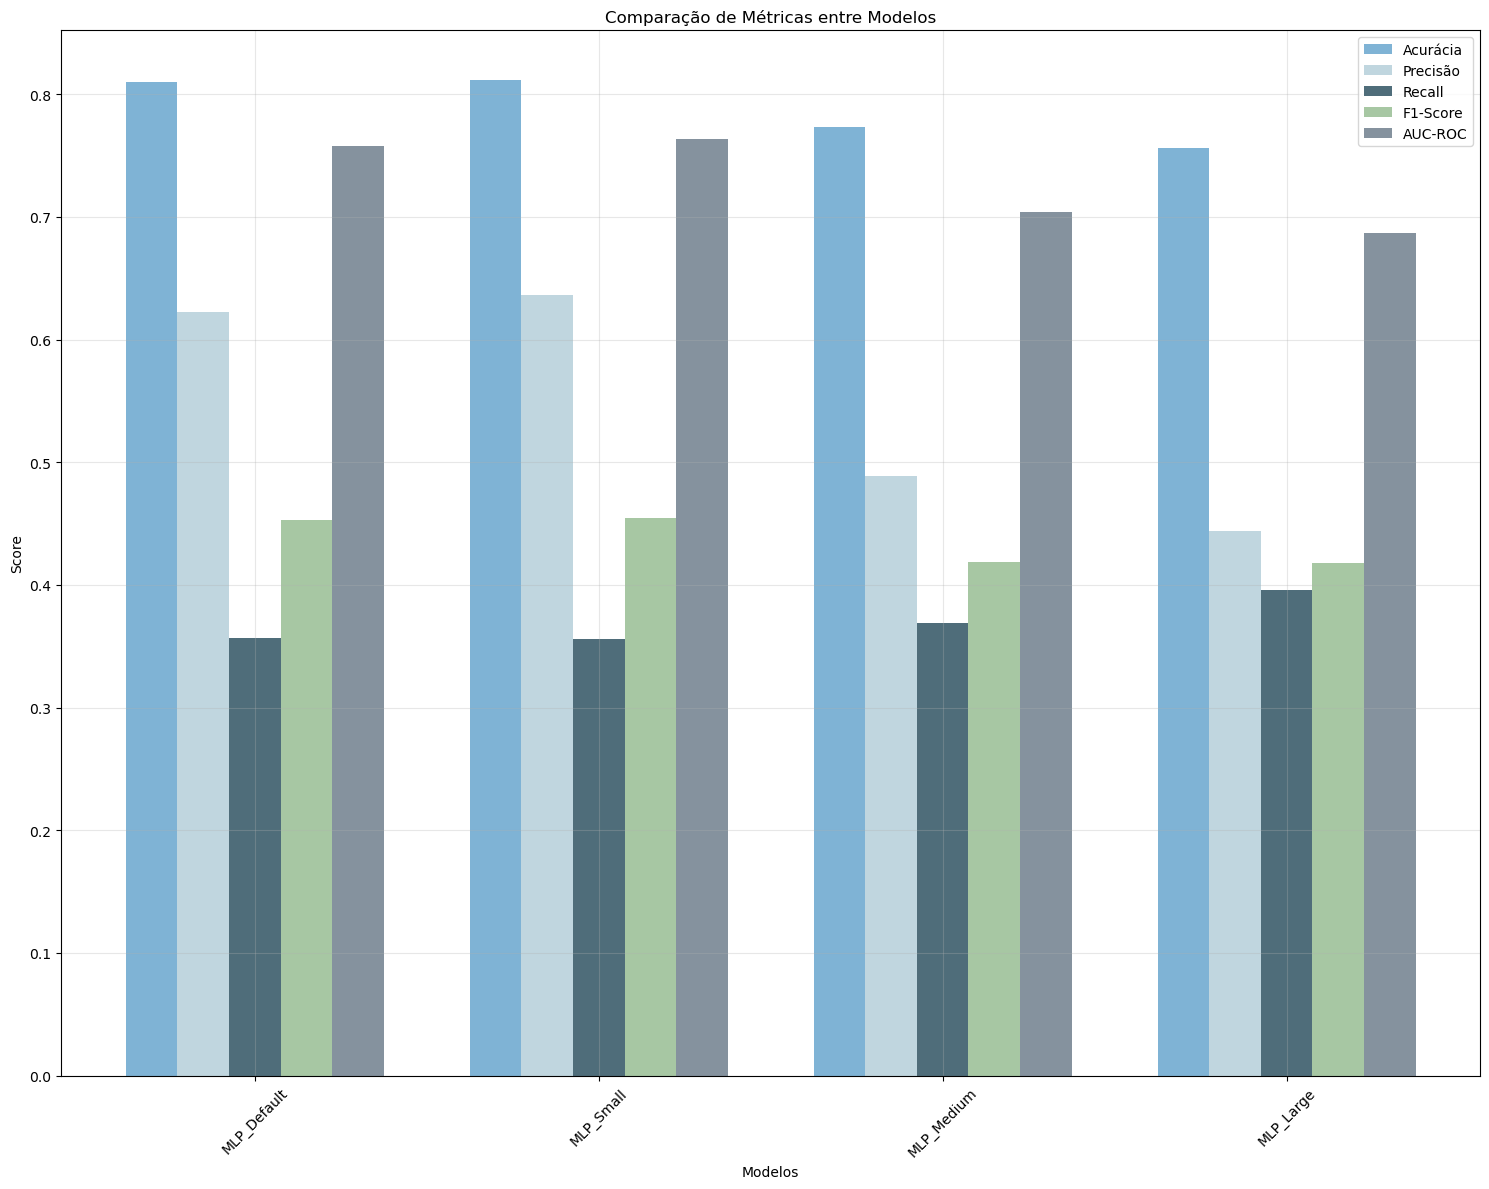

In [94]:
# Visualizações comparativas
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Gráfico de barras das métricas
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(results_cv_df))
width = 0.15

# Paleta de cores escolhida
soft_colors = ['#7FB3D5', '#C0D6DF', '#4F6D7A', '#A7C7A3', '#85929E']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_cv_df[metric], width, label=metric, color=soft_colors[i])

ax.set_xlabel('Modelos')
ax.set_ylabel('Score')
ax.set_title('Comparação de Métricas entre Modelos')
ax.set_xticks(x + width*2)
ax.set_xticklabels(results_cv_df['Modelo'], rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Comparação de Métricas entre Modelos

O gráfico apresenta uma comparação visual das principais métricas de avaliação para quatro modelos de redes neurais MLP (Multi-Layer Perceptron): **MLP_Default**, **MLP_Small**, **MLP_Medium** e **MLP_Large**.

### O que cada barra representa?

Para cada modelo, são exibidas as seguintes métricas:
- **Acurácia:** Proporção total de acertos do modelo.
- **Precisão:** Proporção de predições positivas corretas.
- **Recall:** Proporção de positivos reais identificados corretamente.
- **F1-Score:** Média harmônica entre precisão e recall, útil para avaliar o equilíbrio entre as duas métricas.
- **AUC-ROC:** Mede a capacidade do modelo de separar as classes (quanto mais próximo de 1, melhor).

### O que o gráfico mostra?

- **MLP_Default** e **MLP_Small** apresentam as maiores acurácias, F1-scores e AUC-ROC, indicando melhor desempenho geral.
- **MLP_Small** tem leve vantagem em precisão, recall e F1-score em relação aos demais, mostrando-se o modelo mais equilibrado.
- **MLP_Medium** e **MLP_Large** apresentam métricas inferiores, principalmente em precisão, recall e F1-score, sugerindo que aumentar o tamanho da rede não trouxe ganhos para este problema.
- O **AUC-ROC** acompanha a tendência das outras métricas, reforçando que os dois primeiros modelos têm melhor capacidade de distinguir entre clientes adimplentes e inadimplentes.

### Conclusão

O gráfico facilita a comparação entre os modelos, mostrando que **MLP_Small** é o mais indicado para este conjunto de dados, pois apresenta o melhor equilíbrio entre as principais métricas

## **6. ANÁLISE DETALHADA DO MELHOR MODELO**

In [95]:
# Definir o melhor modelo com base na maior AUC-ROC
best_model_idx = results_cv_df['AUC-ROC'].idxmax()
best_model_name = results_cv_df.loc[best_model_idx, 'Modelo']
print(f"Melhor modelo (maior AUC-ROC): {best_model_name}")

Melhor modelo (maior AUC-ROC): MLP_Small


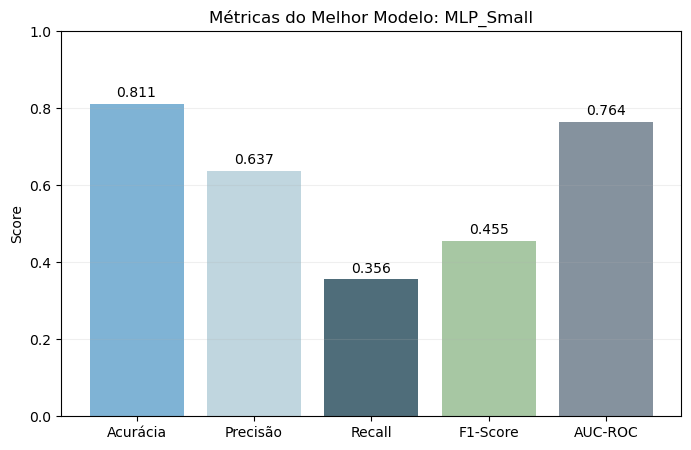

In [98]:
# Plot das métricas do melhor modelo

best_metrics = results_cv_df.loc[best_model_idx, ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']]

plt.figure(figsize=(8, 5))
bars = plt.bar(best_metrics.index, best_metrics.values, color=soft_colors)
plt.title(f'Métricas do Melhor Modelo: {best_model_name}')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.2)

# Adiciona os valores nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.3f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## Explicação do Gráfico: Métricas do Melhor Modelo (MLP_Small)

Este gráfico apresenta as principais métricas de avaliação do modelo **MLP_Small**, considerado o melhor entre os testados para prever inadimplência de clientes de cartão de crédito.

### O que cada barra representa?

- **Acurácia (0.811):** Proporção total de acertos do modelo, ou seja, quantas previsões foram corretas em relação ao total de casos.
- **Precisão (0.637):** Entre todas as previsões de inadimplência feitas pelo modelo, 63,7% realmente eram inadimplentes.
- **Recall (0.356):** O modelo conseguiu identificar corretamente 35,6% de todos os clientes inadimplentes reais.
- **F1-Score (0.455):** Média harmônica entre precisão e recall, mostrando o equilíbrio entre identificar inadimplentes e evitar falsos positivos.
- **AUC-ROC (0.764):** Mede a capacidade do modelo de separar clientes adimplentes e inadimplentes; quanto mais próximo de 1, melhor.

### Interpretação

- O modelo tem **boa acurácia geral** e **boa capacidade de separar as classes** (AUC-ROC).
- A **precisão** é razoável, mas o **recall** é baixo, indicando que o modelo ainda deixa de identificar muitos inadimplentes.
- O **F1-score** reflete esse equilíbrio moderado entre precisão e recall.
- Esses resultados são comuns em problemas com classes desbalanceadas, como é o caso deste dataset.

**Resumo:**  
O gráfico mostra que o modelo é eficiente para prever clientes adimplentes, mas ainda pode ser aprimorado para identificar inadimplentes.

In [101]:
from sklearn.model_selection import cross_val_predict

# Obtendo as predições de validação cruzada (usando o melhor modelo)
y_pred_cv = cross_val_predict(
    mlp_configs[best_model_name], X_scaled, y, cv=5
)

# Os valores reais são simplesmente y (já alinhados)
y_true_cv = y.reset_index(drop=True)

# Criar um DataFrame com os resultados: valor real, valor previsto e probabilidade prevista
y_proba_cv = cross_val_predict(
    mlp_configs[best_model_name], X_scaled, y, cv=5, method='predict_proba'
)[:, 1]  # Probabilidade da classe 1 (default)

results_df = pd.DataFrame({
    'Valor Real': y_true_cv,
    'Valor Previsto': y_pred_cv,
    'Probabilidade Prevista': y_proba_cv
})

results_df.head(30)

,Valor Real,Valor Previsto,Probabilidade Prevista
0,1,1,0.511950
1,1,0,0.446543
2,0,0,0.110581
3,0,0,0.137237
4,0,0,0.082174
5,0,0,0.100254
6,0,0,0.077928
7,0,0,0.091314
8,0,0,0.140934
9,0,0,0.212982


# Análise dos Resultados de Predição

### Resumo dos Dados

Foram fornecidos 30 exemplos com os seguintes campos:
- **Valor Real:** Classe verdadeira (0 = adimplente, 1 = inadimplente)
- **Valor Previsto:** Classe prevista pelo modelo
- **Probabilidade Prevista:** Probabilidade atribuída pelo modelo à classe 1 (inadimplente)

### Interpretação

- **Acertos e Erros:**
  - O modelo acertou a maioria dos exemplos da classe 0 (adimplente), geralmente prevendo corretamente quando a probabilidade prevista é baixa (bem abaixo de 0,5).
  - Para a classe 1 (inadimplente), o modelo acertou quando a probabilidade prevista ficou acima de 0,5 (ex: índice 0, 13 e 22).
  - Houve erros em alguns casos de classe 1, especialmente quando a probabilidade prevista ficou próxima ou abaixo do limiar de 0,5 (ex: índices 1, 16, 21, 23, 26).

- **Confiança do Modelo:**
  - Para exemplos negativos (classe 0), as probabilidades previstas são consistentemente baixas, indicando alta confiança nessas previsões.
  - Para exemplos positivos (classe 1), o modelo só prevê corretamente quando a probabilidade é significativamente maior que 0,5. Em muitos casos, a probabilidade ficou próxima do limiar, levando a erros de classificação.

- **Sensibilidade ao Limiar:**
  - O modelo parece conservador para prever inadimplência (classe 1), só classificando como 1 quando a probabilidade é bem alta.
  - Muitos exemplos de classe 1 receberam probabilidades próximas de 0,5, mas foram classificados como 0, o que pode indicar um recall baixo para inadimplentes.

### Resumo

- O modelo está **muito confiante** ao prever adimplentes (classe 0), mas **tem dificuldade** em identificar inadimplentes (classe 1) quando a probabilidade não é muito alta.
- Isso é típico em problemas desbalanceados, onde o modelo tende a favorecer a classe majoritária.
- **Sugestão:** Se o objetivo for aumentar o recall para inadimplentes, pode ser interessante ajustar o limiar de decisão (por exemplo, considerar como inadimplente quem tiver probabilidade acima de 0,4 ao invés de 0,5).

---
**Conclusão:**  
O modelo é conservador para prever inadimplência, acertando principalmente os adimplentes e errando parte dos inadimplentes, especialmente quando a probabilidade prevista está próxima do limiar padrão.